# Домашнее задание 3.1


# 🏃‍♂️🤸‍♂️🏋️‍♀️ 
Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [3]:
workouts

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530
...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**

Как это сделать?

1. Работать будем с датафреймом `workouts`.
2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [4]:
# напиши код здесь
# 2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). 
# Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. 
# После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.

trainings_by_day = workouts.resample('d', on='start_at')['workout_id'].count()
trainings_by_day 

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

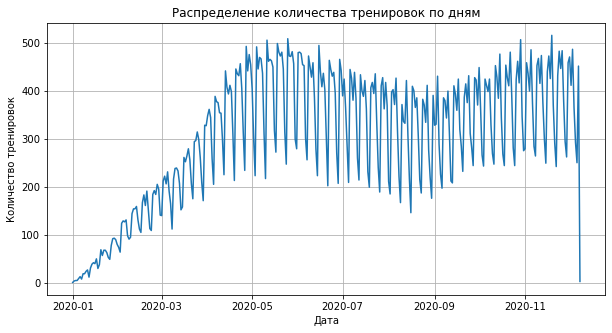

In [5]:
# 3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
#     - размер графика
#     - название графика 
#     - подпись оси `X` 

plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() # сетка

plt.plot(trainings_by_day)
plt.show()

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения количества тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
      


In [6]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [7]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [8]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [9]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments


{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

In [10]:
workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == 'Spartacus']
workouts_by_Spartacus_trainer = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == 'Spartacus']
workouts_by_Spartacus_trainer = workouts_by_Spartacus_trainer[['trainer_id', 'workouts']]
workouts_by_Spartacus_trainer

,trainer_id,workouts
0,1994,26
1,4446,9
2,9256,9
3,14431,11
4,15062,8
...,...,...
1598,10669820,2
1601,10676774,5
1602,10676833,6
1603,10682541,13


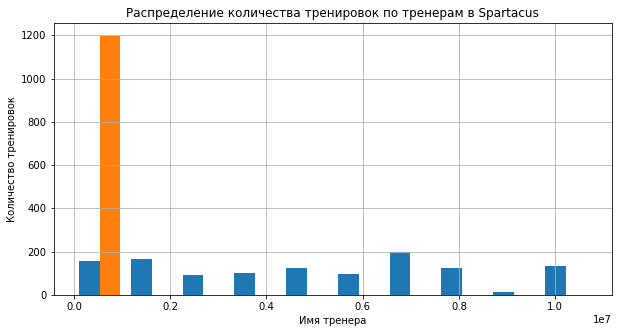

In [21]:
# напиши код здесь
plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение количества тренировок по тренерам в Spartacus') 
plt.xlabel('Имя тренера') 
plt.ylabel('Количество тренировок') 
plt.grid() # сетка

plt.hist(workouts_by_Spartacus_trainer)
plt.show()



## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В функцию, которая строит boxplot, передай аргументы: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй цвет
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график?

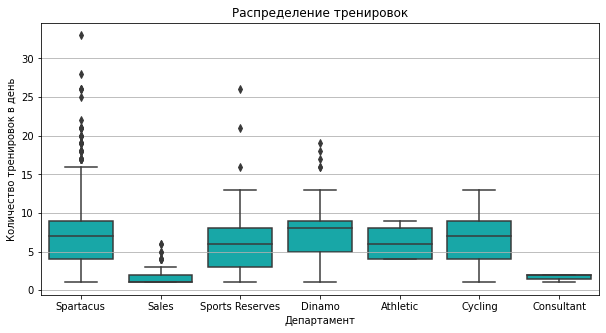

In [12]:
# напиши код здесь
plt.figure(figsize=(10, 5))  # Зададим размер фигуры
plt.title('Распределение тренировок') # Подпишем заголовок графика
plt.grid() # сетка
#отрисовываем ящик с усами
sns.boxplot(x='trainer_department',
            y='workouts',
            data = workouts_by_trainer, 
            color='c')
plt.xlabel('Департамент') # Подпишем ось X (в seaborn - после построения графика)
plt.ylabel('Количество тренировок в день')
plt.show()



## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [24]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':1,'failed_by_client':0})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,1.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.757576
4,500,9,0.764706
...,...,...,...
185,1500,47,1.000000
186,1500,49,0.875000
187,1500,50,0.500000
188,1500,55,0.812500


In [25]:
#     - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, 
# но без возраста, только с ценой
cost_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index() #считаем долю прогулов по возрасту
cost_data_agg

,cost,status
0,500,0.745004
1,750,0.789591
2,1000,0.841990
3,1500,0.878388


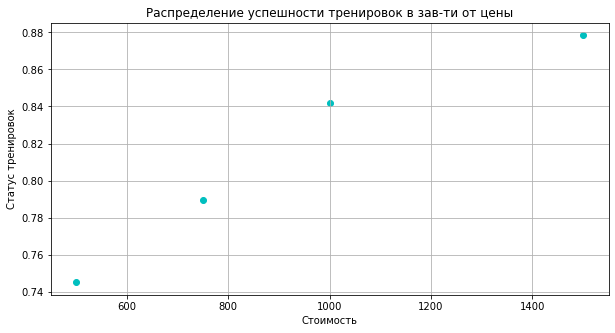

In [47]:
#     - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:

plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение успешности тренировок в зав-ти от цены') 
plt.xlabel('Стоимость') 
plt.ylabel('Статус тренировок') 
plt.grid() # сетка

plt.scatter(cost_data_agg['cost'],
         cost_data_agg['status'],
         color = 'c')
plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [27]:
# напиши код здесь
age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index() #считаем долю прогулов по возрасту
age_data_agg

,age,status
0,4,0.744186
1,5,0.500000
2,6,0.783784
3,7,0.758621
4,8,0.750000
5,9,0.758294
6,10,0.747628
7,11,0.751306
8,12,0.754777
9,13,0.756208


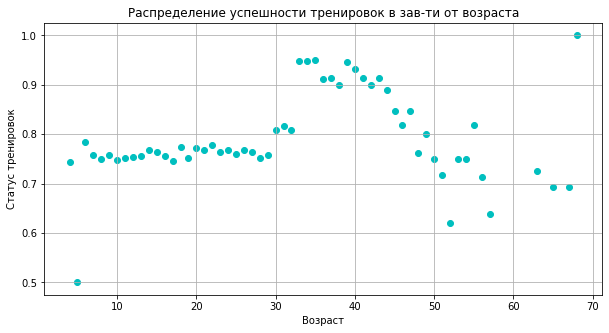

In [46]:
#     - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:

plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение успешности тренировок в зав-ти от возраста') 
plt.xlabel('Возраст') 
plt.ylabel('Статус тренировок') 
plt.grid() # сетка

plt.scatter(age_data_agg['age'],
         age_data_agg['status'],
         color = 'c')
plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**
    - создай словарь цветов и цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  `с` - цвета для разных цен
          

In [42]:
# напиши код здесь
prices = set(cost_age_data['cost'])
price_color = {500:'c', 
          750:'tab:olive', 
          1000:'r', 
          1500:'k'}
cost_age_data_agg['cost'].map(price_color)


0            c
1    tab:olive
2            r
3            k
Name: cost, dtype: object

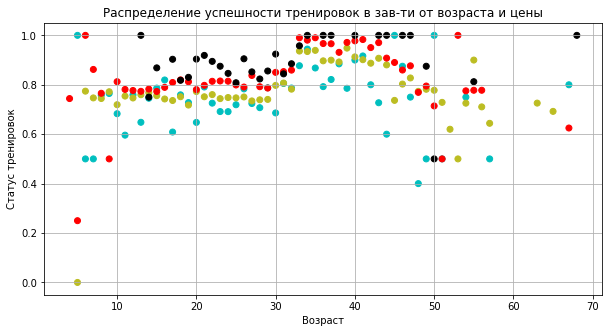

In [45]:
plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение успешности тренировок в зав-ти от возраста и цены') 
plt.xlabel('Возраст') 
plt.ylabel('Статус тренировок') 
plt.grid() # сетка

plt.scatter(cost_age_data_agg['age'],
         cost_age_data_agg['status'],
        c = cost_age_data_agg['cost'].map(price_color))
plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике?

In [49]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [50]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.713422
1,500,21-25,0.716495
2,500,26-30,0.744403
3,500,31-35,0.834783
4,500,36-40,0.824427
5,500,41-45,0.808511
6,500,46-50,0.714286
7,500,50+,0.692308
8,750,0-20,0.750555
9,750,21-25,0.749876


In [57]:
heat_cost_age_data = cost_age_data_agg.pivot(index="age_bin", 
                                        columns="cost", 
                                        values="status")
heat_cost_age_data

cost,500,750,1000,1500
age_bin,,,,
0-20,0.713422,0.750555,0.793045,0.866337
21-25,0.716495,0.749876,0.809229,0.841216
26-30,0.744403,0.750555,0.808068,0.875294
31-35,0.834783,0.871886,0.930420,0.899687
36-40,0.824427,0.902885,0.964809,1.000000
41-45,0.808511,0.890354,0.932900,1.000000
46-50,0.714286,0.801252,0.828829,0.902439
50+,0.692308,0.703008,0.760870,0.823529


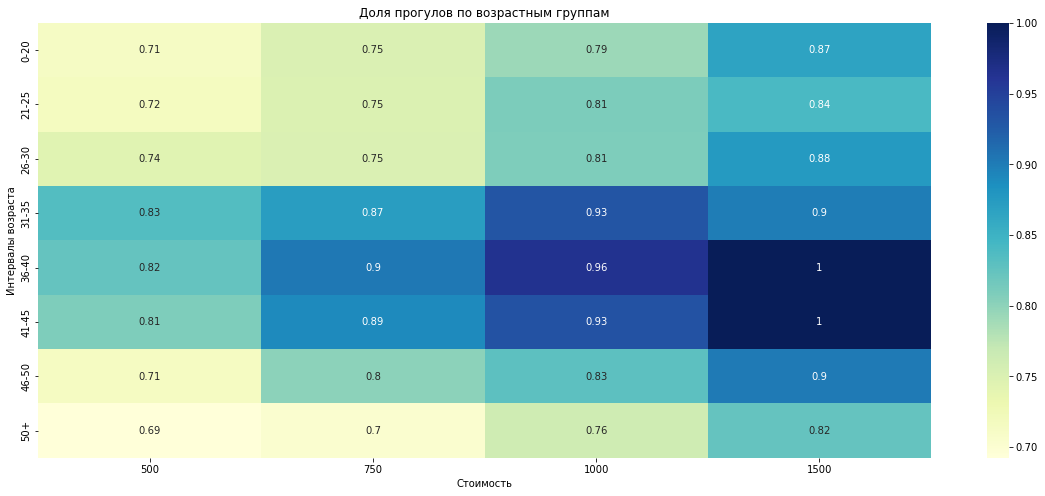

In [60]:
# 2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, 
# столбцами — цена занятия, значением — доля прогулов.
plt.figure(figsize=(20,8))
sns.heatmap(heat_cost_age_data, 
            annot=True, 
            cmap="YlGnBu")
plt.title("Доля прогулов по возрастным группам")
plt.ylabel("Интервалы возраста")
plt.xlabel("Стоимость")
plt.show()

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалали:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки `week_day_num` по `workouts` с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию, параллельную оси `X`, со значением `y` равным средним количеством тренировок в день. Если не помнишь, как это делать, смело смотри шпаргалку – там ты найдешь все детали.
5. Если еще осталось желание исследовать новое, можешь добавить на график название дней недели, задав их с помощью метода `plt.xticks`, его ты легко найдешь в документации. 
6. Оставь комментарий: что ты видишь на графике? 

**Подготовим данные**

In [ ]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

In [ ]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [ ]:
trainings_by_day_frame['week_day_num'] += 1 

In [ ]:
# напиши код здесь

# 🎉🎉🎉 Поздравляем, ты великолепен! 